In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# 우분투 한글깨짐 현상 해결
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'

# 윈도우 한글깨짐 현상 해결
matplotlib.rc("font", family = "Malgun Gothic")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

# 1.데이터 불러오기 및 전처리

In [2]:
df_raw = pd.read_excel("model1_dataset.xlsx")
df_raw.head()

,customer_id,insu_risk_expense,gender,age,bmi,waist,bp_min,bp_max,risk
0,C117780,194376.0,0,50,23.939481,83.0,85,130,0
1,C117780,-1869370.0,0,50,23.939481,83.0,85,130,1
2,C121178,-913949.0,0,30,24.816327,86.0,80,125,1
3,C116605,-1813374.0,0,50,26.259585,88.0,80,130,1
4,C129391,-4495124.0,1,35,19.227688,72.0,80,120,1


In [3]:
df_raw.isnull().sum()

customer_id          0
insu_risk_expense    0
gender               0
age                  0
bmi                  0
waist                0
bp_min               0
bp_max               0
risk                 0
dtype: int64

In [4]:
df_raw_y = df_raw["risk"]
df_raw_x = df_raw.drop(['customer_id', 'insu_risk_expense', 'risk'], axis = 1, inplace = False)

In [5]:
df_train_x, df_test_x,df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)
print("train data size : {}".format(df_train_x.shape))
print("test data size : {}".format(df_test_x.shape))
print("train data size : {}".format(df_train_y.shape))
print("test data size : {}".format(df_test_y.shape))

train data size : (3329, 6)
test data size : (1428, 6)
train data size : (3329,)
test data size : (1428,)


In [6]:
nn_uncustomized = MLPClassifier(random_state = 1234)
nn_uncustomized.fit(df_train_x, df_train_y)
print("Accuracy on training set : {:.3f}".format(nn_uncustomized.score(df_train_x,df_train_y)))
print("Accuracy on test set : {:.3f}".format(nn_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set : 0.496
Accuracy on test set : 0.519


In [7]:
nn_uncustomized

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1234, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

## 2. MLPClassifier 모델 파라미터 변경

## - 은닉층 변경

In [8]:
train_accuracy = []; test_accuracy = [];

para_hidden = [20* hidden for hidden in range(1,6)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state = 1234)  
    nn.fit(df_train_x,df_train_y)
    train_accuracy.append(nn.score(df_train_x,df_train_y))
    test_accuracy.append(nn.score(df_test_x,df_test_y))
    
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

df_accuracy_hidden.round(3)

,HiddenLayer,TrainAccuracy,TestAccuracy
0,20,0.505,0.493
1,40,0.499,0.525
2,60,0.504,0.532
3,80,0.538,0.535
4,100,0.496,0.519


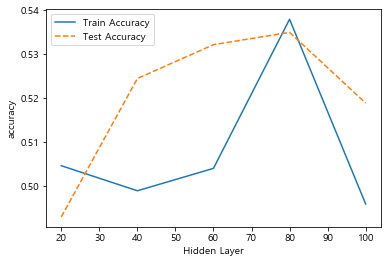

In [9]:
#그래프로 확인
plt.plot(para_hidden, train_accuracy,linestyle='-',label='Train Accuracy')
plt.plot(para_hidden, test_accuracy,linestyle='--',label='Test Accuracy')
plt.ylabel("accuracy"); plt.xlabel("Hidden Layer")
plt.legend()

train 정확도와 test 정확도의 차이가 가장 작고 train 정확도와 test 정확도가 높은 80을 선택한다. (hidden_layer_sizes=80)

## -활성함수 변경

In [10]:
train_accuracy = []; test_accuracy = [];

para_function = ["logistic", "tanh", "relu"]

for v_function in para_function:
    nn = MLPClassifier(hidden_layer_sizes=80, activation = v_function, random_state = 1234)
    
    nn.fit(df_train_x,df_train_y)
    train_accuracy.append(nn.score(df_train_x,df_train_y))
    test_accuracy.append(nn.score(df_test_x,df_test_y))
    
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_function
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

df_accuracy_hidden.round(3)

,HiddenLayer,TrainAccuracy,TestAccuracy
0,logistic,0.535,0.547
1,tanh,0.536,0.549
2,relu,0.538,0.535


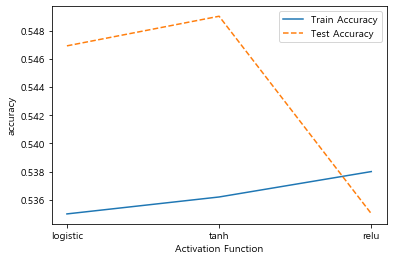

In [11]:
#그래프로 확인
plt.plot(para_function, train_accuracy,linestyle='-',label='Train Accuracy')
plt.plot(para_function, test_accuracy,linestyle='--',label='Test Accuracy')
plt.ylabel("accuracy"); plt.xlabel("Activation Function")
plt.legend()

train 정확도와 test 정확도 차이가 적은 relu 함수를 선택한다.

## Standardsclaer scale 변경

In [12]:
v_feature_name = df_train_x.columns

scaler = StandardScaler()
df_scaled_x = scaler.fit_transform(df_raw_x)
df_scaled_x = pd.DataFrame(df_scaled_x, columns = v_feature_name)
df_scaled_x.head()

,gender,age,bmi,waist,bp_min,bp_max
0,-1.352724,0.399823,0.333388,0.663925,1.344883,1.404923
1,-1.352724,0.399823,0.333388,0.663925,1.344883,1.404923
2,-1.352724,-1.640359,0.684243,1.040286,0.501717,0.828575
3,-1.352724,0.399823,1.261738,1.291193,0.501717,1.404923
4,0.739249,-1.130313,-1.551955,-0.716067,0.501717,0.252227


In [13]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_scaled_x, df_raw_y, test_size=0.3, random_state=1234)

print("train data X size :{}".format(df_train_x.shape))
print("train data Y size :{}".format(df_train_y.shape))
print("test data X size :{}".format(df_test_x.shape))
print("test data Y size :{}".format(df_test_y.shape))

train data X size :(3329, 6)
train data Y size :(3329,)
test data X size :(1428, 6)
test data Y size :(1428,)


In [14]:
nn_scaled = MLPClassifier(random_state = 1234)
nn_scaled.fit(df_train_x,df_train_y)

print("Accuracy on training set : {:.3f}".format(nn_uncustomized.score(df_train_x,df_train_y)))
print("Accuracy on test set : {:.3f}".format(nn_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set : 0.520
Accuracy on test set : 0.529


C:\Users\PIAI\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


스케일링 후 모델 성능이 향상되었다.

In [15]:
nn_scaled

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1234, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

## -은닉층 변경

In [16]:
train_accuracy = []; test_accuracy = [];

para_hidden = [10* hidden for hidden in range(1,6)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state = 1234)  
    nn.fit(df_train_x,df_train_y)
    train_accuracy.append(nn.score(df_train_x,df_train_y))
    test_accuracy.append(nn.score(df_test_x,df_test_y))
    
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

df_accuracy_hidden.round(3)

C:\Users\PIAI\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\PIAI\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,HiddenLayer,TrainAccuracy,TestAccuracy
0,10,0.551,0.527
1,20,0.555,0.516
2,30,0.566,0.526
3,40,0.577,0.522
4,50,0.582,0.527


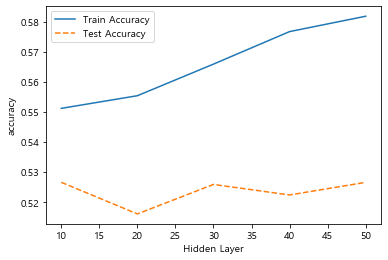

In [17]:
#그래프로 확인
plt.plot(para_hidden, train_accuracy,linestyle='-',label='Train Accuracy')
plt.plot(para_hidden, test_accuracy,linestyle='--',label='Test Accuracy')
plt.ylabel("accuracy"); plt.xlabel("Hidden Layer")
plt.legend()

In [18]:
train_accuracy = []; test_accuracy = [];

para_hidden = [20* hidden for hidden in range(1,11)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden,v_hidden), random_state = 1234)
    nn.fit(df_train_x,df_train_y)
    train_accuracy.append(nn.score(df_train_x,df_train_y))
    test_accuracy.append(nn.score(df_test_x,df_test_y))
    
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

df_accuracy_hidden.round(3)

C:\Users\PIAI\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\PIAI\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\PIAI\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\PIAI\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

,HiddenLayer,TrainAccuracy,TestAccuracy
0,20,0.604,0.513
1,40,0.645,0.504
2,60,0.652,0.505
3,80,0.680,0.505
4,100,0.707,0.513
5,120,0.710,0.509
6,140,0.707,0.515
7,160,0.726,0.498
8,180,0.738,0.507
9,200,0.734,0.524


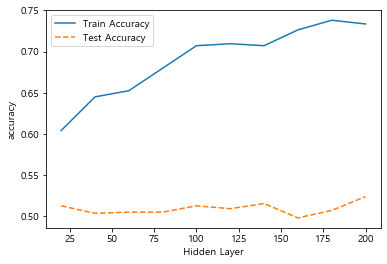

In [19]:
#그래프로 확인
plt.plot(para_hidden, train_accuracy,linestyle='-',label='Train Accuracy')
plt.plot(para_hidden, test_accuracy,linestyle='--',label='Test Accuracy')
plt.ylabel("accuracy"); plt.xlabel("Hidden Layer")
plt.legend()

은닉층이 1개여도 2개여도 노드의 수를 늘릴수록 train 정확도와 test 정확도의 차이가 커져 과대적합된다. 따라서 은닉층을 따로 설정하지 않는다.

## -활성함수 변경

In [20]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# activation 변경
para_function = ['logistic','tanh','relu']

for v_function in para_function:
    nn = MLPClassifier(activation = v_function, random_state=1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_function = pd.DataFrame()
df_accuracy_function["ActivationFunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy

# Activation Function별 정확도 테이블
df_accuracy_function.round(3)

C:\Users\PIAI\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.534,0.536
1,tanh,0.552,0.531
2,relu,0.602,0.523


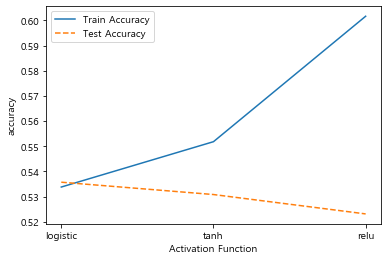

In [21]:
# Activation Function별 정확도 그래프로 확인
plt.plot(para_function, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_function, test_accuracy, linestyle="--", label="Test Accuracy")
plt.ylabel("accuracy");plt.xlabel("Activation Function")
plt.legend()

In [22]:
# Activation Function 지정(임의)
activation = 'logistic'

## - 가중치 최적화 변경

In [30]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# solver 변경
para_solver = ['lbfgs','sgd','adam']

for v_solver in para_solver:
    nn = MLPClassifier(solver=v_solver,activation = activation, random_state=1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_solver = pd.DataFrame()
df_accuracy_solver["Solver"] = para_solver
df_accuracy_solver["TrainAccuracy"] = train_accuracy
df_accuracy_solver["TestAccuracy"] = test_accuracy

# Solver별 정확도 테이블
df_accuracy_solver.round(3)

,Solver,TrainAccuracy,TestAccuracy
0,lbfgs,0.540,0.546
1,sgd,0.506,0.509
2,adam,0.534,0.536


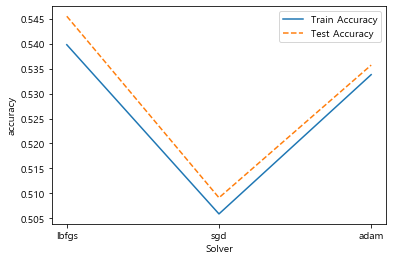

In [31]:
# 정확도 그래프로 확인
plt.plot(para_solver, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_solver, test_accuracy, linestyle="--", label="Test Accuracy")
plt.ylabel("accuracy");plt.xlabel("Solver")
plt.legend()

In [32]:
# Solver 지정(임의)
solver = 'adam'

## - Mini Batch 변경

In [33]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# Mini Batch 변경
para_batch = [20*batch for batch in range(1,10)]

for v_batch in para_batch:
    nn = MLPClassifier(batch_size = v_batch, solver=solver, activation = activation, random_state=1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_batch = pd.DataFrame()
df_accuracy_batch["Mini Batch"] = para_batch
df_accuracy_batch["TrainAccuracy"] = train_accuracy
df_accuracy_batch["TestAccuracy"] = test_accuracy

# Mini Batch Size별 정확도 테이블
df_accuracy_batch.round(3)

,Mini Batch,TrainAccuracy,TestAccuracy
0,20,0.533,0.536
1,40,0.540,0.543
2,60,0.530,0.550
3,80,0.535,0.547
4,100,0.540,0.543
5,120,0.515,0.524
6,140,0.521,0.529
7,160,0.529,0.537
8,180,0.535,0.539


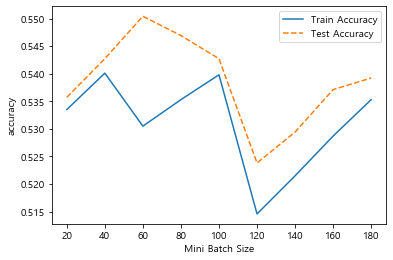

In [34]:
# 정확도 그래프로 확인
plt.plot(para_batch, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_batch, test_accuracy, linestyle="--", label="Test Accuracy")
plt.ylabel("accuracy");plt.xlabel("Mini Batch Size")
plt.legend()

train 정확도와 test 정확도 차이가 가장 적은 40을 선택한다. (batch_size=40)

# 3. 결론 도출

In [35]:
# 최종모델
nn_final = MLPClassifier(activation = activation, solver = solver,
                         batch_size = 40, random_state=1234)
nn_final.fit(df_train_x, df_train_y)

# 평가
y_pred = nn_final.predict(df_test_x)

# train 데이터 셋 정확도
print('Accuracy on training set:{:.3f}'.format(nn_final.score(df_train_x,df_train_y)))
# test 데이터 셋 정확도
print('Accuracy on test set:{:.3f}'.format(nn_final.score(df_test_x,df_test_y)))
# Confusion matrix
print('Confusion matrix:\n{}'.format(confusion_matrix(df_test_y,y_pred)))

Accuracy on training set:0.540
Accuracy on test set:0.543
Confusion matrix:
[[333 359]
 [294 442]]


train 정확도와 test 정확도 모두 높아졌으며 이 둘의 차이가 적어져 과대적합이 해소되었다.